# Analyse Xenium dataset

### Resources: 
* https://squidpy.readthedocs.io/en/stable/notebooks/tutorials/tutorial_xenium.html
* https://www.nature.com/articles/s41592-021-01358-2

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq

import warnings
warnings.filterwarnings('ignore')

### Load the h5 and csv files
* h5 contains counts, csv the metadata

In [2]:
adata = sc.read_10x_h5("/path/to/data/xenium_october_2023/output-XETG00101__0017191__Region_1__20231020__081506/cell_feature_matrix.h5")

In [3]:
df = pd.read_csv("/path/to/data/xenium_october_2023/output-XETG00101__0017191__Region_1__20231020__081506/cells.csv.gz")

In [4]:
df.head()

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,nucleus_area
0,aaaaapdf-1,151.602051,16867.837891,8,0,0,0,0,8,10.340782,4.786563
1,aaaabnme-1,151.364914,16879.962891,18,0,0,0,0,18,41.092189,13.817813
2,aaaacadj-1,154.677292,16892.457031,31,0,0,0,0,31,51.342658,16.256251
3,aaaaceaj-1,153.437027,16884.232422,26,0,0,0,0,26,38.292501,12.192188
4,aaaaffdl-1,155.971344,16887.703125,24,0,0,0,0,24,28.900001,7.360469


In [5]:
df.set_index(adata.obs_names, inplace=True)

In [6]:
adata.obs = df.copy()

In [7]:
adata.obsm["spatial"] = adata.obs[["x_centroid", "y_centroid"]].copy().to_numpy()

## First look into resulting object
We have just build an anndata object with 894.603 cells (rows), where we measured 377 genes (columns). Metadata info is available

In [8]:
adata

AnnData object with n_obs × n_vars = 894603 × 377
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'

In [9]:
adata.var

,gene_ids,feature_types,genome
ABCC11,ENSG00000121270,Gene Expression,Unknown
ACE2,ENSG00000130234,Gene Expression,Unknown
ACKR1,ENSG00000213088,Gene Expression,Unknown
ACTA2,ENSG00000107796,Gene Expression,Unknown
ACTG2,ENSG00000163017,Gene Expression,Unknown
...,...,...,...
UPK3B,ENSG00000243566,Gene Expression,Unknown
VCAN,ENSG00000038427,Gene Expression,Unknown
VSIG4,ENSG00000155659,Gene Expression,Unknown
VWA5A,ENSG00000110002,Gene Expression,Unknown


## Metadata
The per row (cell) metadata
* Notice the cell coordinates **(x_centroid, y_centroid)**, per cell **transcript_counts**, **cell_area** and **nucleus_area**

In [10]:
adata.obs

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,nucleus_area
aaaaapdf-1,aaaaapdf-1,151.602051,16867.837891,8,0,0,0,0,8,10.340782,4.786563
aaaabnme-1,aaaabnme-1,151.364914,16879.962891,18,0,0,0,0,18,41.092189,13.817813
aaaacadj-1,aaaacadj-1,154.677292,16892.457031,31,0,0,0,0,31,51.342658,16.256251
aaaaceaj-1,aaaaceaj-1,153.437027,16884.232422,26,0,0,0,0,26,38.292501,12.192188
aaaaffdl-1,aaaaffdl-1,155.971344,16887.703125,24,0,0,0,0,24,28.900001,7.360469
...,...,...,...,...,...,...,...,...,...,...,...
oildfoog-1,oildfoog-1,10205.842773,16825.371094,0,0,0,0,0,0,587.573146,10.611719
oildigmn-1,oildigmn-1,10446.406250,16258.013672,1,0,0,0,0,1,876.437688,11.153594
oildknhj-1,oildknhj-1,10259.832031,16852.867188,0,0,0,0,0,0,504.575956,7.812032
oildmiaa-1,oildmiaa-1,10276.331055,16859.257812,1,0,0,0,0,1,702.405494,22.984532


### Quality Control 

In [11]:
sc.pp.calculate_qc_metrics(adata, percent_top=(10, 20, 50, 150), inplace=True)

The percentage of control probes and control codewords can be calculated from adata.obs

Read on quality scores, controls codewords: https://www.10xgenomics.com/support/in-situ-gene-expression/documentation/steps/onboard-analysis/xenium-algorithms-overview#decode

In [12]:
cprobes = (
    adata.obs["control_probe_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
cwords = (
    adata.obs["control_codeword_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
print(f"Negative DNA probe count % : {cprobes}")
print(f"Negative decoding count % : {cwords}")

Negative DNA probe count % : 0.00312894780892942
Negative decoding count % : 0.0027557959059210527


Next we plot the distribution of total transcripts per cell, unique transcripts per cell, area of segmented cells and the ratio of nuclei area to their cells

<Axes: title={'center': 'Nucleus ratio'}, ylabel='Count'>

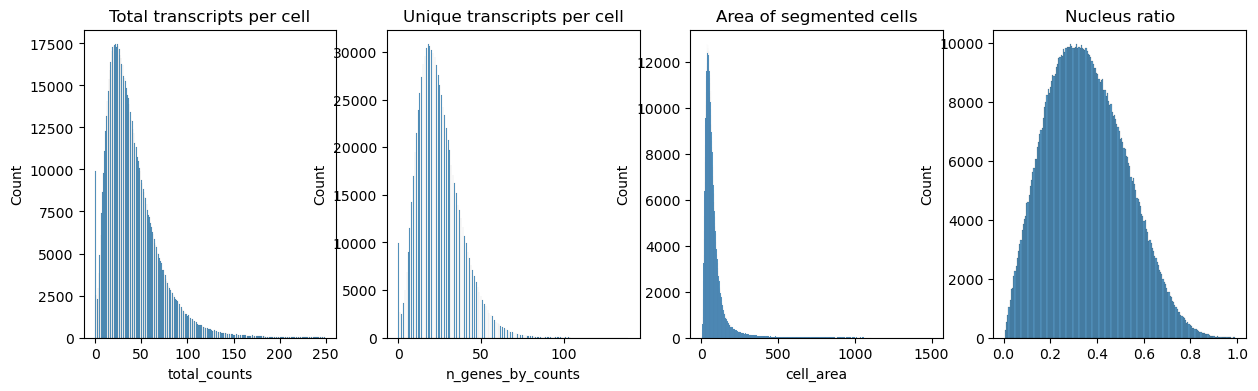

In [13]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

axs[0].set_title("Total transcripts per cell")
sns.histplot(
    adata.obs["total_counts"][adata.obs["total_counts"]<250],
    kde=False,
    ax=axs[0],
)

axs[1].set_title("Unique transcripts per cell")
sns.histplot(
    adata.obs["n_genes_by_counts"],
    kde=False,
    ax=axs[1],
)


axs[2].set_title("Area of segmented cells")
sns.histplot(
    adata.obs["cell_area"],
    kde=False,
    ax=axs[2],
)

axs[3].set_title("Nucleus ratio")
sns.histplot(
    adata.obs["nucleus_area"] / adata.obs["cell_area"],
    kde=False,
    ax=axs[3],
)

Filter the cells based on the minimum number of counts required using scanpy.pp.filter_cells. Filter the genes based on the minimum number of cells required with scanpy.pp.filter_genes. The parameters for the both were specified based on the plots above. They were set to filter out the cells and genes with minimum counts and minimum cells respectively.

Other filter criteria might be cell area, DAPI signal or a minimum of unique transcripts.

In [14]:
sc.pp.filter_cells(adata, min_counts=5)
sc.pp.filter_genes(adata, min_cells=3)

## Disect the upper right corner 
Use coordinates to disect. This is first trimester ovary

In [15]:
adata_slice = adata[(adata.obs["x_centroid"]>6000) & (adata.obs["y_centroid"]<6000), :].copy()
adata_slice

AnnData object with n_obs × n_vars = 19795 × 377
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    obsm: 'spatial'

## Preprocessing 
Normalize counts per cell using scanpy.pp.normalize_total and Logarithmize

In [16]:
adata_slice.layers["counts"] = adata_slice.X.copy()
sc.pp.normalize_total(adata_slice, 
                      inplace=True)
sc.pp.log1p(adata_slice)
sc.pp.pca(adata_slice)
sc.pp.neighbors(adata_slice)
sc.tl.umap(adata_slice)
sc.tl.leiden(adata_slice,
             resolution = 1)

## Total Counts

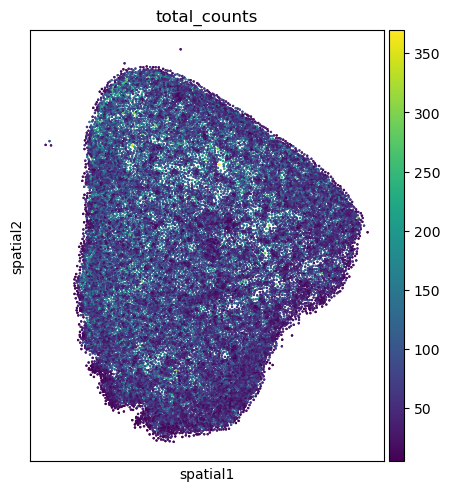

In [17]:
sq.pl.spatial_scatter(
    adata_slice,
    library_id="spatial",
    color=[
        "total_counts",
    ],
    shape=None,
    size=2,
    img=False,
)

## Visualize annotation on UMAP and spatial coordinates
Subplot with scatter plot in UMAP (Uniform Manifold Approximation and Projection) basis. The embedded points were colored, respectively, according to the total counts and leiden clusters in each of the subplots. This gives us some idea of what the data looks like.

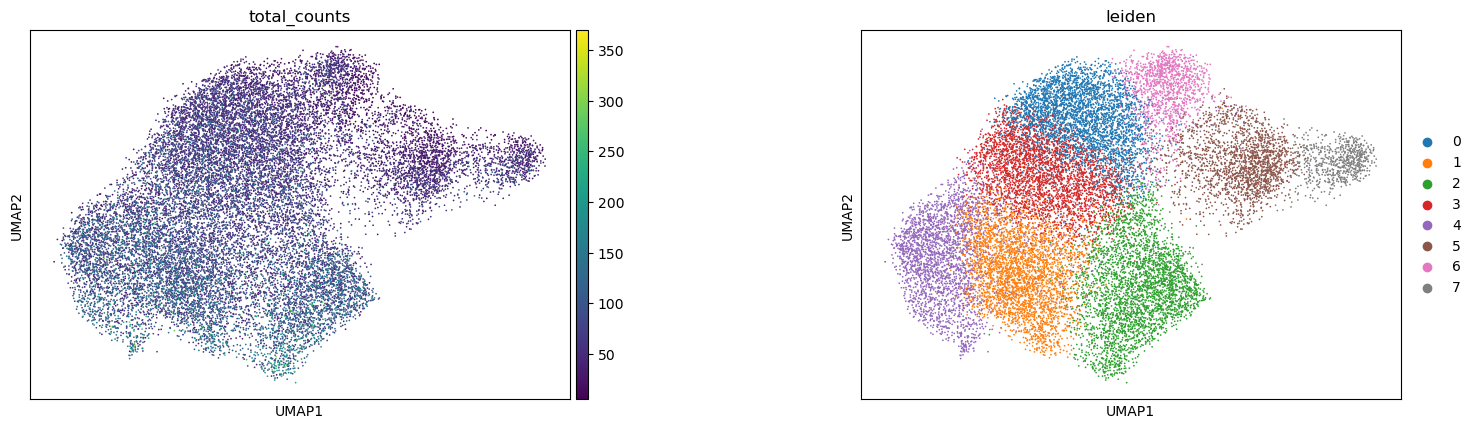

In [18]:
sc.pl.umap(
    adata_slice,
    color=[
        "total_counts",
        "leiden",
    ],
    wspace=0.4,
)

## Calculate marker genes for each cluster

In [19]:
sc.tl.rank_genes_groups(adata_slice, 
                        'leiden', 
                        method='t-test')
pd.DataFrame(adata_slice.uns['rank_genes_groups']['names']).head(10)



,0,1,2,3,4,5,6,7
0,SERPINB9,PCNA,PDPN,GATM,PCNA,PDGFRA,BASP1,CD34
1,MET,KIT,KIT,SERPINB9,TOP2A,OGN,UPK3B,VWF
2,GATM,CENPF,FBLN1,C15orf48,EPCAM,GPC3,SERPINB9,CD93
3,TCF4,TOP2A,TCL1A,MET,CCNB2,VCAN,DIRAS3,GNG11
4,PTN,CCNB2,ACTG2,PTN,COL17A1,PDGFRB,MET,CAVIN1
5,VWA5A,CDK1,THY1,MEST,RTKN2,COL5A2,PTGDS,PECAM1
6,GPC1,PPARG,PRDM1,DST,PPARG,C7,KLK11,TCIM
7,CAV1,EPCAM,TENT5C,VWA5A,C15orf48,TCIM,FBN1,TM4SF18
8,DPEP1,MKI67,CENPF,CAV1,DNAAF1,FBN1,GPC1,CLEC14A
9,DST,RTKN2,SFRP2,MDM2,CFAP53,PCOLCE,MEDAG,EGFL7


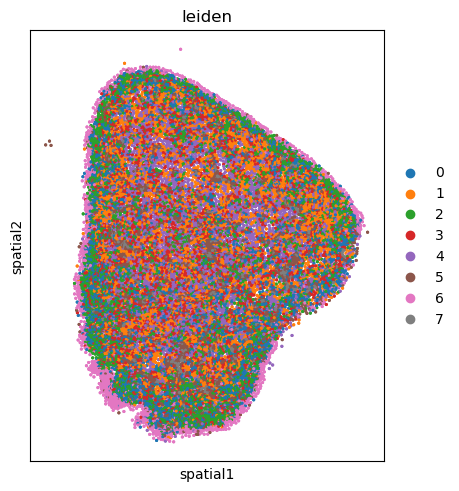

In [20]:
sq.pl.spatial_scatter(
    adata_slice,
    library_id="spatial",
    shape=None,
    color=[
        "leiden",
    ],
    wspace=0.4,
)

### Plot A few genes 

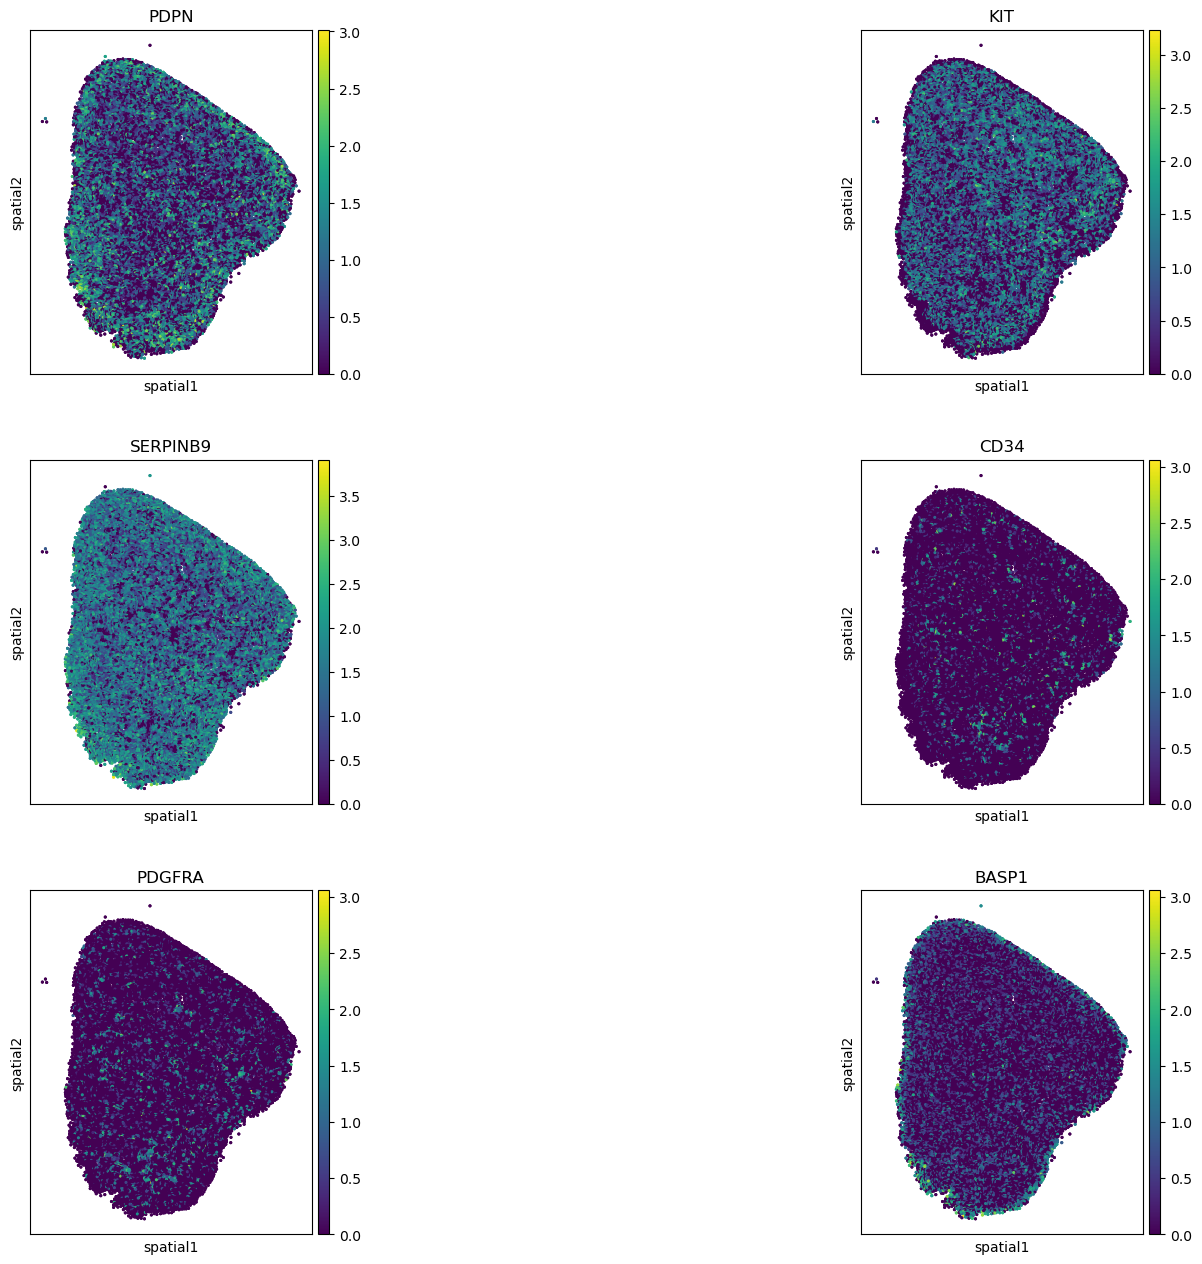

In [21]:
sq.pl.spatial_scatter(
    adata_slice,
    library_id="spatial",
    shape=None,
    color=["PDPN",
           "KIT",
           "SERPINB9",
           "CD34",
           "PDGFRA",
           "BASP1",
          ],
    wspace=0.4,
    ncols=2,
)

## Computation of spatial statistics
### Building the spatial neighbors graphs
This example shows how to compute centrality scores, given a spatial graph and cell type annotation.

The scores calculated are closeness centrality, degree centrality and clustering coefficient with the following properties:

* closeness centrality - measure of how close the group is to other nodes.
* clustering coefficient - measure of the degree to which nodes cluster together.
* degree centrality - fraction of non-group members connected to group members.

All scores are descriptive statistics of the spatial graph.

This dataset contains Leiden cluster groups’ annotations in `anndata.AnnData.obs`, which are used for calculation of centrality scores.

First, we need to compute a connectivity matrix from spatial coordinates to calculate the centrality scores. We can use `squidpy.gr.spatial_neighbors` for this purpose. We use the `coord_type="generic"` based on the data and the neighbors are classified with Delaunay triangulation by specifying `delaunay=True`.

In [22]:
sq.gr.spatial_neighbors(adata_slice, 
                        coord_type="generic", 
                        delaunay=True)

## Compute centrality scores

Centrality scores are calculated with `squidpy.gr.centrality_scores`, with the Leiden groups as clusters.

In [23]:
sq.gr.centrality_scores(adata_slice, cluster_key="leiden")

The results were visualized by plotting the average centrality, closeness centrality, and degree centrality using `squidpy.pl.centrality_scores`.

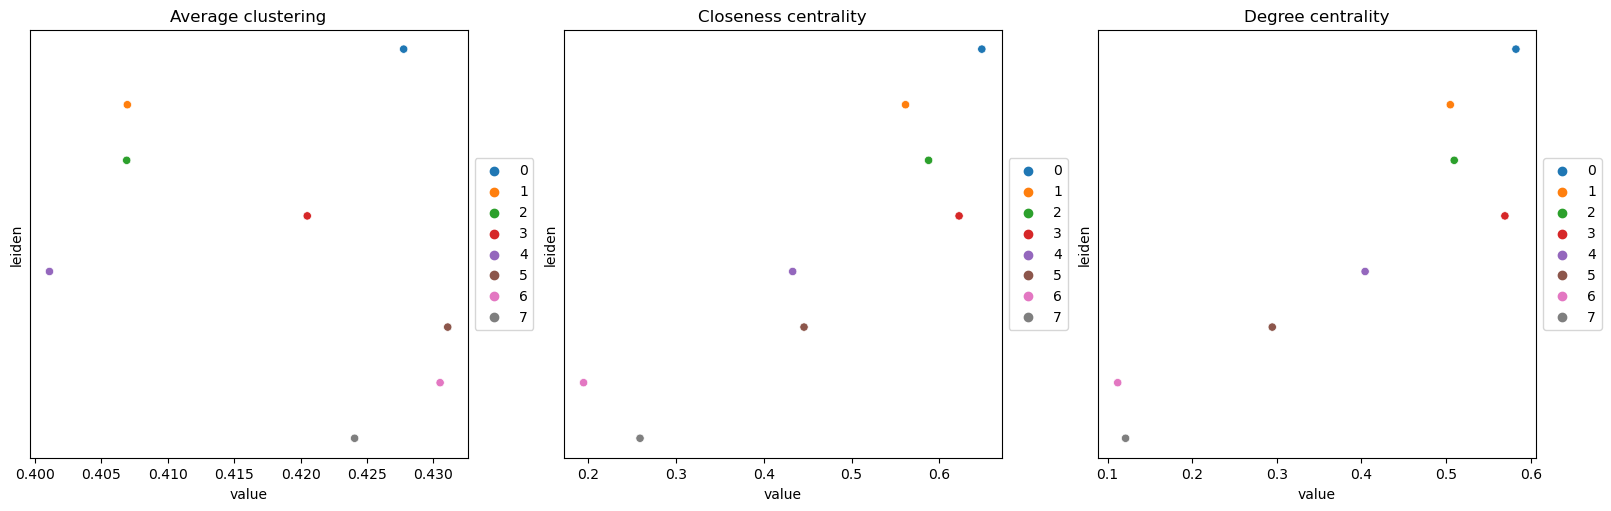

In [24]:
sq.pl.centrality_scores(adata_slice, cluster_key="leiden", figsize=(16, 5))

## Neighbors enrichment analysis
This example shows how to run the neighbors enrichment analysis routine.

It calculates an enrichment score based on proximity on the connectivity graph of cell clusters. The number of observed events is compared against N permutations and a z-score is computed.

This dataset contains cell type annotations in anndata.Anndata.obs which are used for calculation of the neighborhood enrichment. We calculate the neighborhood enrichment score with squidpy.gr.nhood_enrichment.

In [25]:
sq.gr.nhood_enrichment(adata_slice, cluster_key="leiden")

100%|██████████| 1000/1000 [00:01<00:00, 778.93/s]


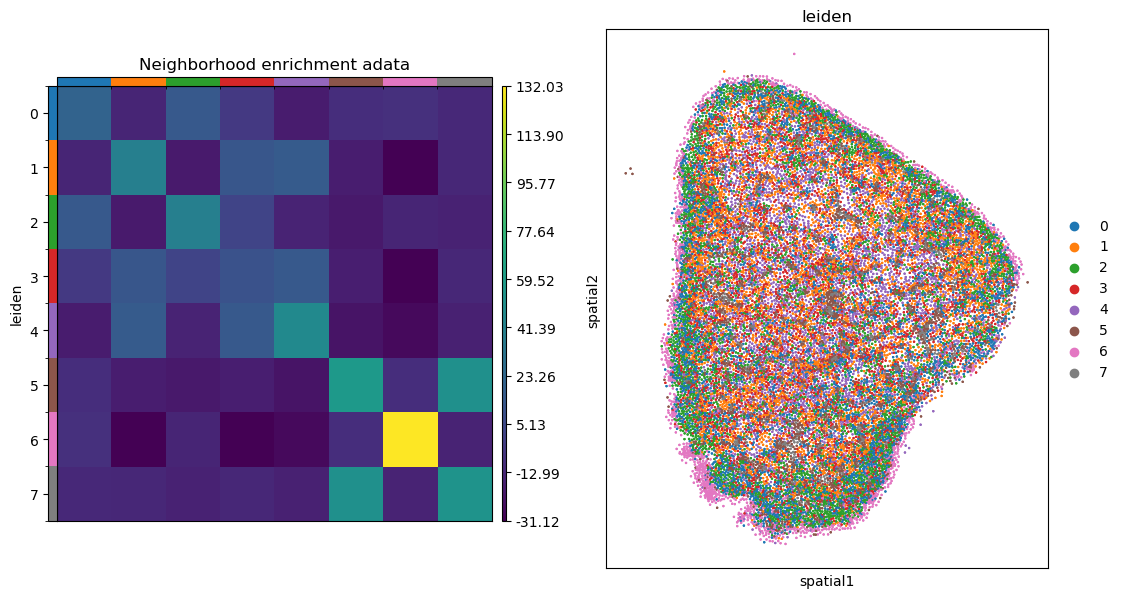

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))
sq.pl.nhood_enrichment(
    adata_slice,
    cluster_key="leiden",
    figsize=(8, 8),
    title="Neighborhood enrichment adata",
    ax=ax[0],
)
sq.pl.spatial_scatter(adata_slice, color="leiden", shape=None, size=2, ax=ax[1])


## Compute Moran’s I score

This example shows how to compute the Moran’s I global spatial auto-correlation statistics.

The Moran’s I global spatial auto-correlation statistics evaluates whether features (i.e. genes) shows a pattern that is clustered, dispersed or random in the tissue are under consideration.

We can compute the Moran’s I score with `squidpy.gr.spatial_autocorr` and `mode = 'moran'`. We first need to compute a spatial graph with `squidpy.gr.spatial_neighbors`. We will also subset the number of genes to evaluate.

From the paper: "Finally, to identify genes that show strong spatial variability, we applied the Moran’s I spatial autocorrelation statistics (Methods) and visualized the top genes"

### A better explanation of Moran's I  
* In the following article, one can find a better expanation of Moran's I: https://www.statology.org/morans-i/
* The value for Moran’s I can range from -1 to 1 where:
  *  -1: The variable of interest is perfectly dispersed
  *  0: The variable of interest is randomly dispersed
  *  1: The variable of interest is perfectly clustered together



In [27]:
sq.gr.spatial_autocorr(
    adata_slice,
    mode="moran",
    n_perms=100,
    n_jobs=1,
)
adata_slice.uns["moranI"].head(10)

100%|██████████| 100/100 [01:58<00:00,  1.19s/]


,I,pval_norm,var_norm,pval_z_sim,pval_sim,var_sim,pval_norm_fdr_bh,pval_z_sim_fdr_bh,pval_sim_fdr_bh
UPK3B,0.361610,0.0,0.000017,0.0,0.009901,0.000019,0.0,0.0,0.01689
PDPN,0.229083,0.0,0.000017,0.0,0.009901,0.000016,0.0,0.0,0.01689
PCNA,0.219125,0.0,0.000017,0.0,0.009901,0.000010,0.0,0.0,0.01689
EPCAM,0.212152,0.0,0.000017,0.0,0.009901,0.000015,0.0,0.0,0.01689
OGN,0.207641,0.0,0.000017,0.0,0.009901,0.000012,0.0,0.0,0.01689
CD34,0.204961,0.0,0.000017,0.0,0.009901,0.000013,0.0,0.0,0.01689
GPC3,0.199201,0.0,0.000017,0.0,0.009901,0.000014,0.0,0.0,0.01689
TOP2A,0.197987,0.0,0.000017,0.0,0.009901,0.000015,0.0,0.0,0.01689
PDGFRA,0.191563,0.0,0.000017,0.0,0.009901,0.000012,0.0,0.0,0.01689
TCIM,0.188069,0.0,0.000017,0.0,0.009901,0.000014,0.0,0.0,0.01689


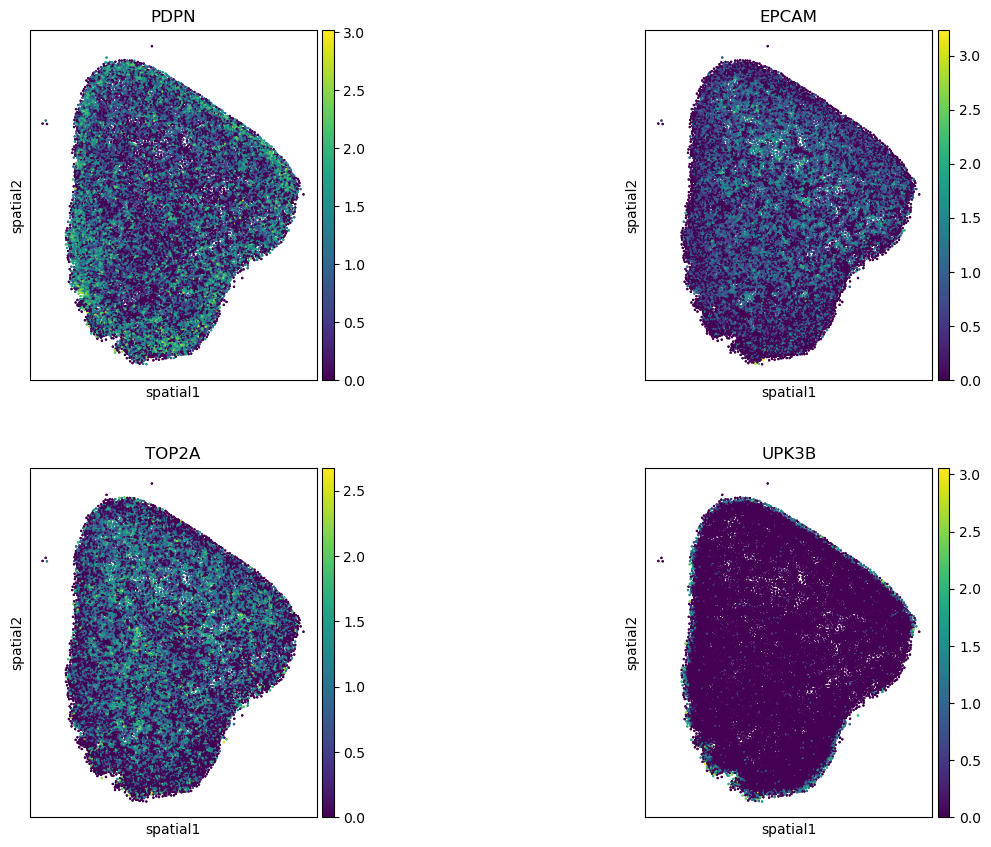

In [28]:
sq.pl.spatial_scatter(
    adata_slice,
    library_id="spatial",
    color=[
        "PDPN",
        "EPCAM",
        "TOP2A",
        "UPK3B"
    ],
    shape=None,
    size=2,
    img=False,
    ncols=2,
)

In [29]:
adata_slice.uns["moranI"].tail(20)

,I,pval_norm,var_norm,pval_z_sim,pval_sim,var_sim,pval_norm_fdr_bh,pval_z_sim_fdr_bh,pval_sim_fdr_bh
LPL,-0.002736,0.257648,0.000017,0.118294,0.118812,0.000008,0.316395,0.154850,0.158276
ACKR1,-0.002751,0.256437,0.000017,0.141519,0.148515,0.000006,0.315937,0.177842,0.189797
S100A12,-0.002915,0.243811,0.000017,0.141410,0.138614,0.000008,0.306389,0.177842,0.179579
CD2,-0.002936,0.242208,0.000017,0.121181,0.128713,0.000008,0.305393,0.157604,0.168489
MCEMP1,-0.003233,0.220317,0.000017,0.165782,0.207921,0.000008,0.279662,0.205592,0.249637
CD300E,-0.003298,0.215688,0.000017,0.088730,0.128713,0.000007,0.274710,0.119897,0.168489
PVALB,-0.003462,0.204224,0.000017,0.138633,0.168317,0.000009,0.266056,0.175976,0.210117
CD5L,-0.003687,0.189139,0.000017,0.072350,0.079208,0.000008,0.248451,0.100649,0.109382
OPRPN,-0.003783,0.182874,0.000017,0.125337,0.158416,0.000009,0.244142,0.161270,0.199742
CYP3A4,-0.003843,0.179072,0.000017,0.072770,0.049505,0.000007,0.240250,0.100862,0.070695


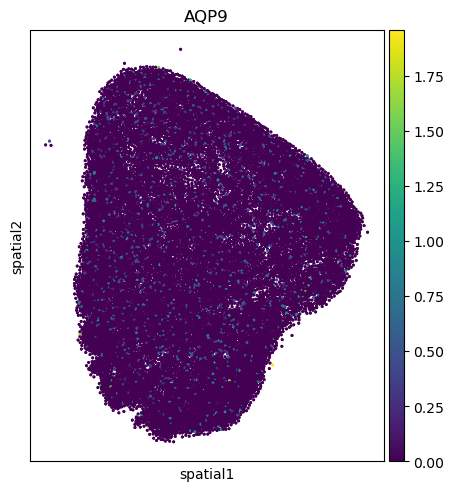

In [30]:
sq.pl.spatial_scatter(
    adata_slice,
    library_id="spatial",
    color=[
        "AQP9",
    ],
    shape=None,
    size=5,
    img=False,
)

## Save as AnnData

In [31]:
adata.write_h5ad("full.h5ad")